In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(as_frame=True)
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

data = df.head()



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


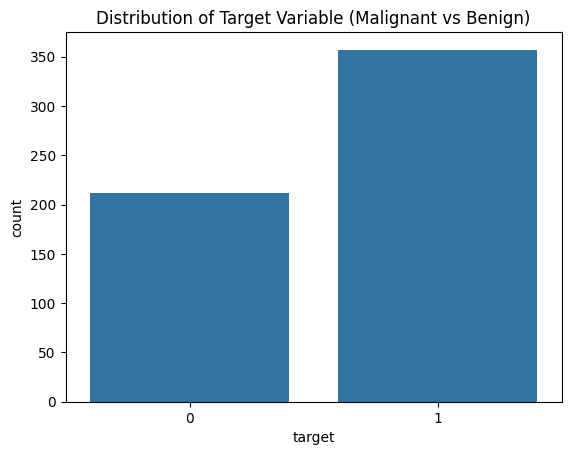

In [8]:
import matplotlib.pyplot as plt
sns.countplot(x=df['target'])
plt.title('Distribution of Target Variable (Malignant vs Benign)')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2836\2555304759.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette="viridis")


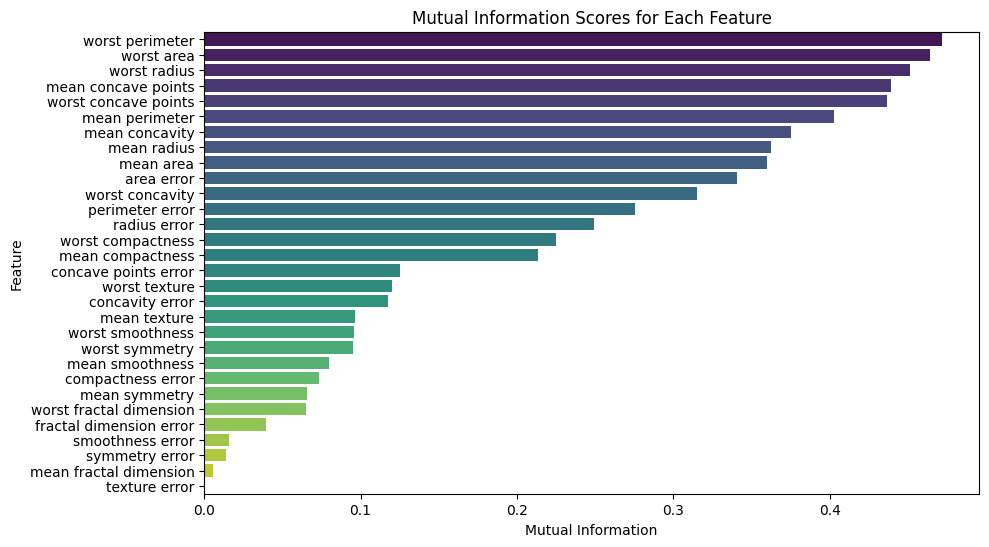

In [9]:
from sklearn.feature_selection import mutual_info_classif

# Split the data into features and target
X = df.drop("target", axis=1)
y = df["target"]

def Show_Feature_Score(X,y):
    # Compute the mutual information scores
    mi_scores = mutual_info_classif(X, y, random_state=42)

    # Create a DataFrame to display the scores
    mi_scores_df = pd.DataFrame({
        'Feature': X.columns,
        'Mutual Information': mi_scores
    })

    # Sort the DataFrame by mutual information scores
    mi_scores_df = mi_scores_df.sort_values(by='Mutual Information', ascending=False)

    # Visualize the mutual information scores
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette="viridis")
    plt.title('Mutual Information Scores for Each Feature')
    plt.show()

Show_Feature_Score(X,y)

In [10]:
def add_combined_feature(X):
    X = X.copy()  # Ensure we're modifying a copy of the DataFrame
    
    # Example feature: combining two features
    X['Combined_radius_texture'] = X['mean radius'] * X['mean texture']
    
    return X

In [11]:
#import train test split
from sklearn.model_selection import train_test_split

X_test,X_train,y_test,y_train=train_test_split(X,y,random_state=42)

In [12]:
X_test.shape,X_train.shape,y_test.shape,y_train.shape

((426, 30), (143, 30), (426,), (143,))

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)



1.0

In [14]:
clf.score(X_test,y_test)

0.931924882629108

In [15]:
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
###
from sklearn.neighbors import KNeighborsClassifier
# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression


In [16]:
models={
    "linear svc":LinearSVC(),
    "kneighborsclassifier":KNeighborsClassifier(),
    "SVC": SVC(),
    "Logistic regression":LogisticRegression()
}

results={}

In [17]:

np.random.seed(42)
for modelname,model in models.items():
    model.fit(X_train,y_train)
    results[modelname]=model.score(X_test,y_test)

results

c:\Users\USER\Desktop\machine_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'linear svc': 0.9342723004694836,
 'kneighborsclassifier': 0.92018779342723,
 'SVC': 0.8990610328638498,
 'Logistic regression': 0.9248826291079812}

<Axes: >

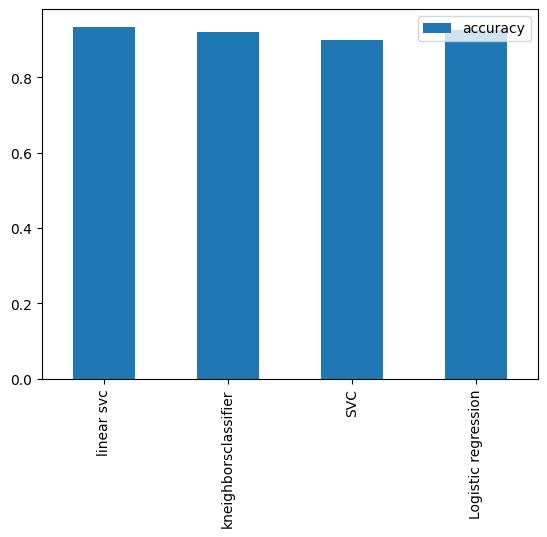

In [96]:
results_df=pd.DataFrame(results.values(),results.keys(),columns=['accuracy'])

results_df.plot.bar()

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import f1_score,recall_score,precision_score

linearsvc=LinearSVC()
linearsvc.fit(X_train,y_train)
y_preds=linearsvc.predict(X_test)
y_preds



array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,

In [19]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,y_preds),recall_score(y_test,y_preds)

(0.9342723004694836, 0.9552238805970149)

In [20]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       158
           1       0.94      0.96      0.95       268

    accuracy                           0.93       426
   macro avg       0.93      0.93      0.93       426
weighted avg       0.93      0.93      0.93       426



In [100]:
print(confusion_matrix(y_test,y_preds))

[[142  16]
 [ 12 256]]


In [21]:
from sklearn.model_selection import cross_val_score

val=cross_val_score(linearsvc,X,y,scoring='accuracy',cv=5,verbose=1)
val

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


array([0.93859649, 0.92982456, 0.97368421, 0.94736842, 0.96460177])

In [22]:
val.std() , val.mean()


(np.float64(0.01621632011383414), np.float64(0.9508150908244062))

In [24]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000, 2000, 5000]
}

# Create the grid search object
grid = GridSearchCV(
    LinearSVC(),
    param_grid=params,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid.fit(X_train, y_train)

# Get the best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print(best_model)

# Evaluate
y_prediction = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_prediction))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.01, 'max_iter': 1000}
LinearSVC(C=0.01)
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       158
           1       0.93      0.95      0.94       268

    accuracy                           0.92       426
   macro avg       0.92      0.91      0.92       426
weighted avg       0.92      0.92      0.92       426



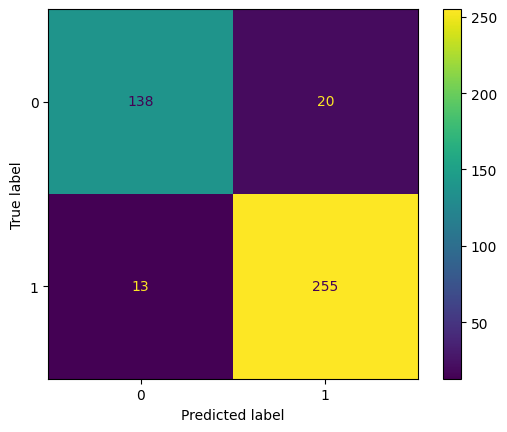

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()


checking weaker models 

In [85]:
weak_models={
    "randomforest":RandomForestClassifier(),
    "kneighborsclassifier":KNeighborsClassifier(),
    "SVC": SVC(),
    "Logistic regression":LogisticRegression()
}

results={}

for modelname,model in weak_models.items():
    model.fit(X_train,y_train)
    results[modelname]=model.score(X_test,y_test)

results


c:\Users\USER\Desktop\machine_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'randomforest': 0.9178403755868545,
 'kneighborsclassifier': 0.92018779342723,
 'SVC': 0.8990610328638498,
 'Logistic regression': 0.9248826291079812}

c:\Users\USER\Desktop\machine_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


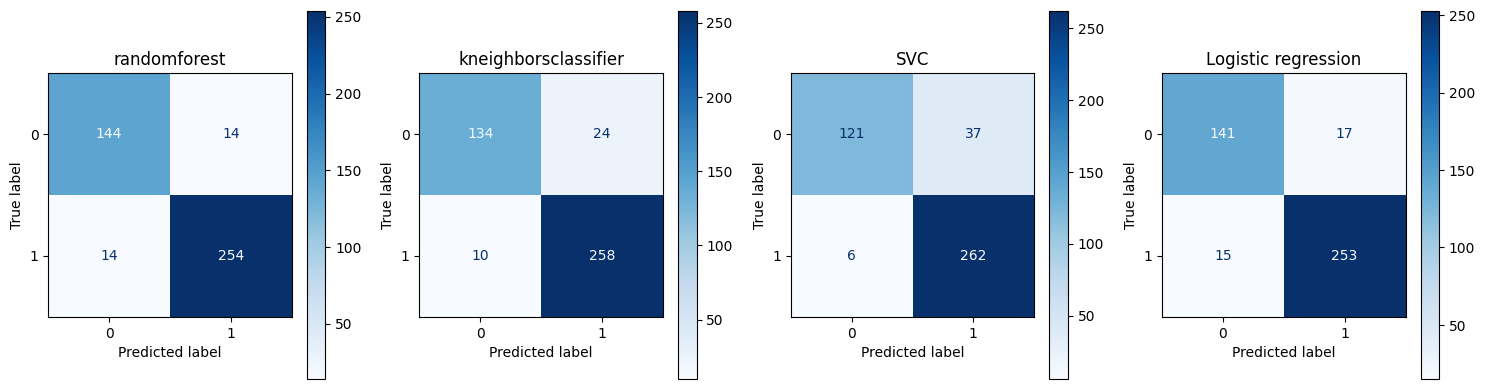

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


weak_models = {
   "randomforest":RandomForestClassifier(),
    "kneighborsclassifier":KNeighborsClassifier(),
    "SVC": SVC(),
    "Logistic regression":LogisticRegression()
}



plt.figure(figsize=(15, 4))
for i, (name, model) in enumerate(weak_models.items(), 1):
    model.fit(X_train,y_train)
    
    plt.subplot(1, 4, i)
    
    ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test, ax=plt.gca(), cmap='Blues'
    )
    plt.title(name)

plt.tight_layout()
plt.show()


In [ ]:
svc=SVC()
svc.fit(X_train,y_train)
y_predss=svc.predict(X_test)
recall_score(y_test,y_predss)


0.9776119402985075

In [112]:
confusion_matrix(y_test,y_predss)

array([[121,  37],
       [  6, 262]])

In [117]:
print(classification_report(y_test,y_predss))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       158
           1       0.88      0.98      0.92       268

    accuracy                           0.90       426
   macro avg       0.91      0.87      0.89       426
weighted avg       0.90      0.90      0.90       426



Best Parameters: {'C': np.float64(0.20684494295802447), 'max_iter': 2000}
Best Score: 1.0
              precision    recall  f1-score   support

           0       0.97      0.69      0.81       158
           1       0.84      0.99      0.91       268

    accuracy                           0.88       426
   macro avg       0.91      0.84      0.86       426
weighted avg       0.89      0.88      0.87       426



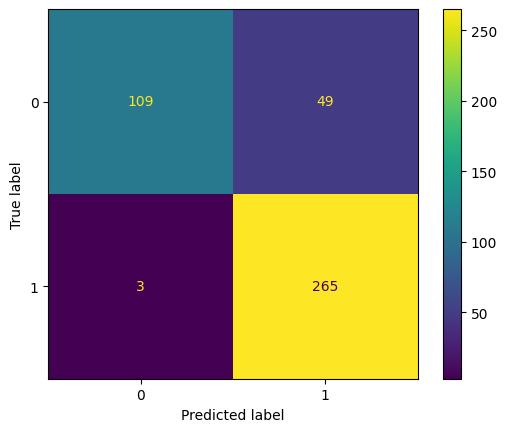

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.001, 10),    
    'max_iter': [1000, 2000, 3000]
}

random_search = RandomizedSearchCV(
    SVC(),
    param_distributions=param_dist,
    n_iter=20,           
    scoring='recall',
    cv=5,
    random_state=42
)


random_search.fit(X_train, y_train)

best_svc=random_search.best_estimator_


y_pred_svc=best_svc.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
ConfusionMatrixDisplay.from_estimator(best_svc, X_test, y_test)
print(classification_report(y_test, y_pred_svc))



In [30]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000, 2000, 5000]
}

# Create the grid search object
grid = GridSearchCV(
    SVC(),
    param_grid=params,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid.fit(X_train, y_train)

# Get the best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print(best_model)

# Evaluate
y_predict = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_predict))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.01, 'max_iter': 1000}
SVC(C=0.01, max_iter=1000)
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       158
           1       0.63      1.00      0.77       268

    accuracy                           0.63       426
   macro avg       0.31      0.50      0.39       426
weighted avg       0.40      0.63      0.49       426



c:\Users\USER\Desktop\machine_learning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\Desktop\machine_learning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\Desktop\machine_learning\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

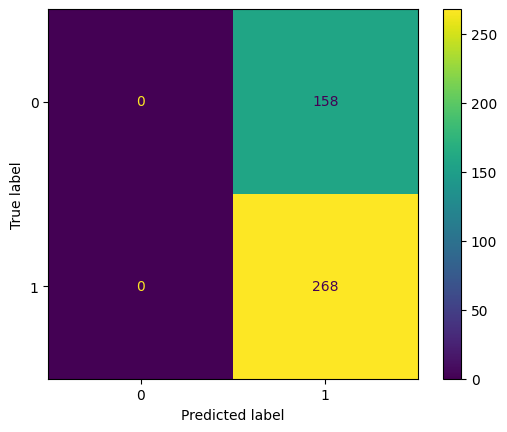

In [31]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

In [32]:
from joblib import dump
dump(best_svc,"best_cancer_model.joblib")

['best_cancer_model.joblib']